=               실습 #1                   =
data:
      age  tall
0   14.3  21.6
1    5.3  11.2
2    9.2  19.1
3   11.0  21.1
4    9.9  18.1
5   14.9  23.3
6   11.6  21.9
7    8.0  17.4
8   13.1  22.5
9   14.8  23.2
10   5.7  12.5
11   8.2  16.6
12   7.2  15.2
13  10.0  18.7
14   9.1  17.2
15  13.0  21.6
16  10.3  19.3
17   5.9  12.2
18   6.1  12.8
19  15.0  22.4
20  10.3  21.3
21  15.0  21.6
22  11.3  22.1
23   8.0  16.4
24  11.8  22.4
<class 'pandas.core.frame.DataFrame'>


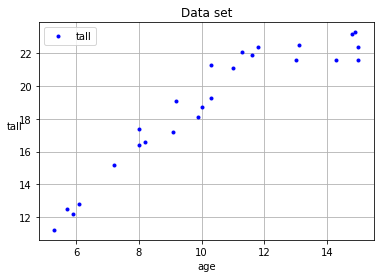

x : age list
 [14.3  5.3  9.2 11.   9.9 14.9 11.6  8.  13.1 14.8  5.7  8.2  7.2 10.
  9.1 13.  10.3  5.9  6.1 15.  10.3 15.  11.3  8.  11.8]
y : tall list
 [21.6 11.2 19.1 21.1 18.1 23.3 21.9 17.4 22.5 23.2 12.5 16.6 15.2 18.7
 17.2 21.6 19.3 12.2 12.8 22.4 21.3 21.6 22.1 16.4 22.4]
x shape :  (25,)


In [2]:
import numpy as np  # 데이터 처리
import pandas as pd # 데이터 처리
import matplotlib.pyplot as plt # 화면에 출력하기 위해서

print("===========================================")
print("=               실습 #1                   =")
print("===========================================")
#데이터 셋 블러오기 및 각 열 age와 tall로 설정
# csv파일이 같은 폴더라 가정
data = pd.read_csv('linear_regression_data01.csv', names=["age", "tall"])
print("data:\n",data)
print(type(data))

# Data set 출력
plt.plot(data['age'], data['tall'], 'b.', label="tall" ) # 화면 출력 1. x축, 2. y축
plt.title("Data set")
plt.xlabel("age")
plt.ylabel("tall", rotation=0)
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

# 기본 설정
x = np.array(data['age'])
y = np.array(data['tall'])
x_size = x.shape
print("x : age list\n",x)
print("y : tall list\n",y)
print("x shape : ",x_size)

In [4]:
print("===========================================")
print("=               실습 #2                   =")
print("===========================================")
##### 해석해

### normal equation
# x에 bias 추가 : 모든 특성을 나타내기 위해 편향 theta0에 가상의 특성 1을 추가
x_bias = np.c_[np.ones(x_size),x]

# theta = (x^T x)^-1 x^T Y로 세타값 계산하는 수식
x_bias_t = x_bias.T
theta = np.linalg.inv(x_bias_t.dot(x_bias)).dot(x_bias_t).dot(y)
print("[Normal Equation] theta0(편향) : ",theta[0], " theta1(기울기) : ",theta[1])

### 수학적 유도
N = x_size[0] # 행 갯수 = 입력 데이터 갯수
x_avg = (sum(x) / N) # x데이터 평균 값

# w0 : 기울기
w0_upper = 0 #분자
w0_lower = 0 #분모

for i in range(N):
    w0_upper += y[i] * (x[i] - x_avg) # Yi * (Xi - avg)
    w0_lower += x[i]**2               # xi ^ 2
W0 = (1/N * w0_upper) / ((1 / N) * w0_lower - x_avg**2)

# w1 : 편향 bias
W1 = 0
for i in range(N):
    W1 += (y[i] - W0*x[i])   # Yi - 기울기 * Xi
W1 /= N

print("[수학적 유도] W0(기울기) : ", W0, " W1(편향) : ",W1)

=               실습 #2                   =
[Normal Equation] theta0(편향) :  7.223327947748386  theta1(기울기) :  1.124003093846684
[수학적 유도] W0(기울기) :  1.1240030938466816  W1(편향) :  7.2233279477483805


=               실습 #3                   =
수학적 유도 모델 값: 23.30 데이터 값: 21.6 오류율: 7.85%
수학적 유도 모델 값: 13.18 데이터 값: 11.2 오류율: 17.68%
수학적 유도 모델 값: 17.56 데이터 값: 19.1 오류율: 8.04%
수학적 유도 모델 값: 19.59 데이터 값: 21.1 오류율: 7.17%
수학적 유도 모델 값: 18.35 데이터 값: 18.1 오류율: 1.39%
수학적 유도 모델 값: 23.97 데이터 값: 23.3 오류율: 2.88%
수학적 유도 모델 값: 20.26 데이터 값: 21.9 오류율: 7.48%
수학적 유도 모델 값: 16.22 데이터 값: 17.4 오류율: 6.81%
수학적 유도 모델 값: 21.95 데이터 값: 22.5 오류율: 2.45%
수학적 유도 모델 값: 23.86 데이터 값: 23.2 오류율: 2.84%
수학적 유도 모델 값: 13.63 데이터 값: 12.5 오류율: 9.04%
수학적 유도 모델 값: 16.44 데이터 값: 16.6 오류율: 0.96%
수학적 유도 모델 값: 15.32 데이터 값: 15.2 오류율: 0.76%
수학적 유도 모델 값: 18.46 데이터 값: 18.7 오류율: 1.27%
수학적 유도 모델 값: 17.45 데이터 값: 17.2 오류율: 1.46%
수학적 유도 모델 값: 21.84 데이터 값: 21.6 오류율: 1.09%
수학적 유도 모델 값: 18.80 데이터 값: 19.3 오류율: 2.59%
수학적 유도 모델 값: 13.85 데이터 값: 12.2 오류율: 13.57%
수학적 유도 모델 값: 14.08 데이터 값: 12.8 오류율: 10.00%
수학적 유도 모델 값: 24.08 데이터 값: 22.4 오류율: 7.52%
수학적 유도 모델 값: 18.80 데이터 값: 21.3 오류율: 11.73%
수학적 유도 모델 값: 24.08 데이터 값: 21.6 오류율: 11.50%
수학적 유도 모델 값: 19.92 데이터 값: 22.

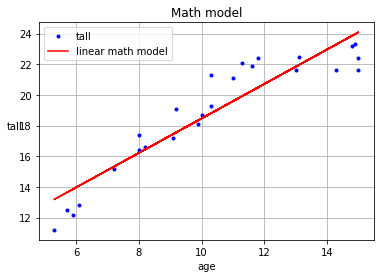

오류율 : 6.22%


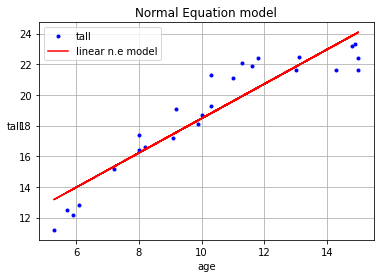

In [5]:
print("===========================================")
print("=               실습 #3                   =")
print("===========================================")

# 수학적 유도 해석해 graph
# 예측값 = W0(기울기) * x데이터 + W1(편향 bias)
y_math_pred = W0 * x + W1
# 각각에 대한 예측 값 & 레이블 값 & 오류 값
error_rate = []
for i in range(x_size[0]):
    error_rate.append(abs(y_math_pred[i]-y[i])/y[i] *100)
    print("수학적 유도 모델 값: {:.2f} 데이터 값: {} 오류율: {:.2f}%".format(y_math_pred[i], y[i], error_rate[i]))
print("최종 오류율 : {:.2f}%".format(np.array(error_rate).mean()))
# 수학적 유도 해석해 graph
plt.plot(x, y, 'b.', label="tall")
plt.plot(x, y_math_pred, 'r-', label="linear math model")
plt.xlabel("age")
plt.ylabel("tall", rotation=0)
plt.title("Math model")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()
# normal equation graph
# 예측 값 = X theta
y_normal_pred = x_bias.dot(theta)
# 오류 값 = (예측 값 - 레이블) / 레이블의 평균을 퍼센트로 나타낸 값
print("오류율 : {:.2f}%".format((abs(y_normal_pred - y)/y * 100).mean()))
plt.plot(x, y, 'b.', label="tall")
plt.plot(x, y_normal_pred, 'r-', label="linear n.e model")
plt.xlabel("age")
plt.ylabel("tall", rotation=0)
plt.title("Normal Equation model")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [7]:
print("===========================================")
print("=               실습 #4                   =")
print("===========================================")
### MSE ###

# 수학적 유도 mse (Mean Square Error)
# 각 요소의 (예측값 - 레이블값)을 제곱을 하기 위해 mapping하였습니다.
math_mse = list(map(lambda x : x**2, y_math_pred - y))

# x_size는 25,1로 기본 설정에 설정하였기 때문에 x_size[0]은 25입니다.
# 각 요소의 합을 한 후 size만큼을 나눠 평균을 구했습니다.
math_mse = sum(math_mse)/x_size[0]
print("수학적 유도 mse : ", math_mse)

# normal equation mse (Mean Square Error)
# 각 요소의 값을 뺀 후 제곱을 하기위해 map사용
normal_equation_mse = list(map(lambda x : x**2, y_normal_pred - y))

# 각 요소 합한 후 데이트 갯수많큼 나눠 평균을 구했습니다.
normal_equation_mse = sum(normal_equation_mse)/x_size[0]
print("Normal equation mse : ", normal_equation_mse)

=               실습 #4                   =
수학적 유도 mse :  1.8631967487108978
Normal equation mse :  1.863196748710897


In [9]:
print("===========================================")
print("=               실습 #5                   =")
print("===========================================")
##### 경사하강법

# 기본
learning_rate = 0.003
n_iter = 20000
# N = x_size[0] 위에서 선언함

np.random.seed(15) # 이후 모든 출력 값을 동일하게 하기 위해 rand값 고정
gd_theta = np.random.randn(2,) # 평균 0 표준편차 1인 정규분포따르는 -1~1사이값 가져옴
gd_theta *= 3  # -1~1의 값 증폭을 위한 값 (시그마값)

# math
# W0(기울기)인지 아닌지를 확인하여 gradient 계산시 필요한 x[i]값을 곱합지 판단하기 위해 which변수 추가
def gradient(which, w, b):
    result = 0
    for i in range(N):
        # 기울기 계산시 : x[i] * (w * x[i] + b - y[i])  = 데이터 * (데이터에 대한 예측 값 - 레이블 값)
        result += (x[i] if which == 0 else 1) * (w*x[i] + b - y[i])
    return 2 / N  * result

# W0 = 기울기
# W1 = bias

def math_gd(iteration=n_iter, W = gd_theta):
    W0 = W[1]
    W1 = W[0] 
    for _ in range(iteration):
        # 이후 가중치 값 = 현재 가중치 값 - learning_rate * 변화량(기울기 값)
        W0 = W0 - learning_rate * gradient(0, W0, W1)
        W1 = W1 - learning_rate * gradient(1, W0, W1)

    return W0, W1

result_math_gd = math_gd()
print("[수식 Gradient] 기울기 : {}, bias : {}".format(W0, W1))
y_math_gd_pred = result_math_gd[0] * x + result_math_gd[1]


# normal
# 비용함수에 대한 편도함수
# 미분 MSE(𝜽) = 2/N * 𝐗𝑇(𝐗𝜽−𝐲)
# 반복횟수와 초기 theta값 받습니다.
def normal_gd(iteration=n_iter, normal_th=gd_theta):
    for _ in range(iteration):
        # 기울기 값 = 미분 MSE
        gradient = 2/N * x_bias.T.dot(x_bias.dot(normal_th) - y)
        # 다음 theta(가중치)값 = 현재 theta값 - learning rate * 변화량(기울기 값)
        normal_th = normal_th - learning_rate * gradient

    return normal_th
result_normal_th = normal_gd()

# 행렬 식을 통한 값이므로 theta0 는 bias, theta1은 기울기입니다.
print("[행렬 Gradient] bias : {}, 기울기 : {}".format(result_normal_th[0],
     result_normal_th[1]))

=               실습 #5                   =
[수식 Gradient] 기울기 : 1.1240030938466816, bias : 7.2233279477483805
[행렬 Gradient] bias : 7.22272523630239, 기울기 : 1.1240566639614322




=               실습 #6                   =
임의의 초기 theta값 :  [-0.93698544  1.01785412]
초기 learning rate :  0.003
초기 반복 값 :  20000
MATH:


C:\Users\parks\AppData\Local\Temp/ipykernel_17272/2461915618.py:21: RuntimeWarning: overflow encountered in double_scalars
  result += (x[i] if which == 0 else 1) * (w*x[i] + b - y[i])
C:\Users\parks\AppData\Local\Temp/ipykernel_17272/2461915618.py:21: RuntimeWarning: invalid value encountered in double_scalars
  result += (x[i] if which == 0 else 1) * (w*x[i] + b - y[i])


[Learning rate] 0.01, [bias,기울기] [nan, nan], [MSE값] : nan
[Learning rate] 0.005, [bias,기울기] [7.223327018048248, 1.1240031764806766], [MSE값] : 1.863197
[Learning rate] 0.001, [bias,기울기] [6.884088747777444, 1.1541553426397606], [MSE값] : 1.872381
[Learning rate] 0.0005, [bias,기울기] [5.564490614095585, 1.2714437341591331], [MSE값] : 2.082812
[Learning rate] 0.0001, [bias,기울기] [1.3308856554449773, 1.6477343935432598], [MSE값] : 4.634252
[Learning rate] 5e-05, [bias,기울기] [0.3201714381851764, 1.7375685268139158], [MSE값] : 5.666403


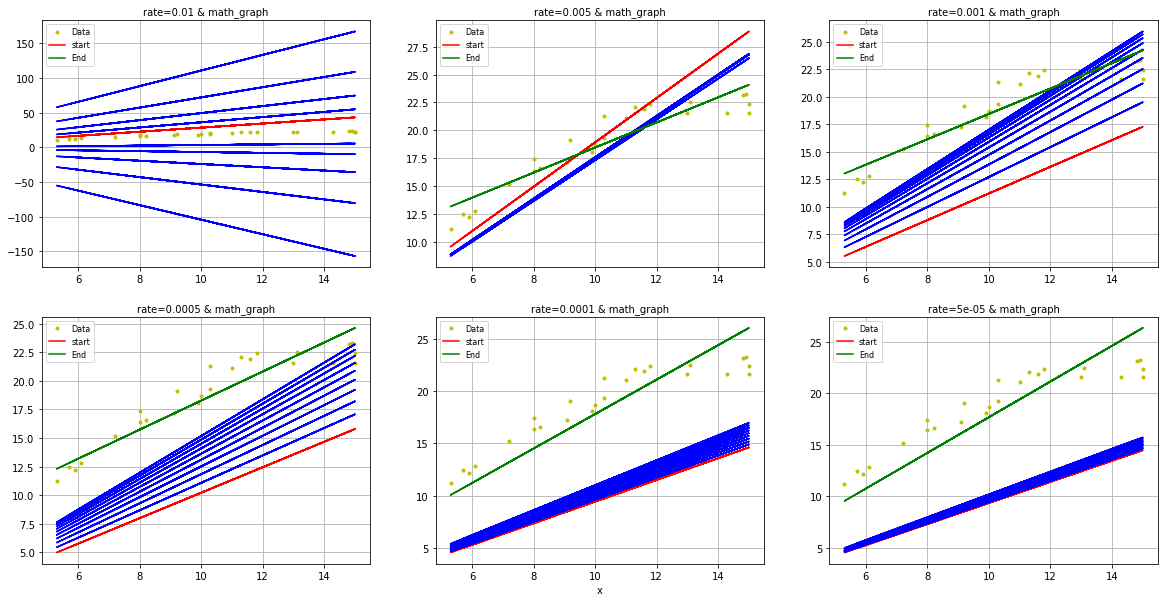

[Learning rate] 0.001, [bias,기울기] [6.884088747777444, 1.1541553426397606], [MSE값] : 1.872381
[Learning rate] 0.002, [bias,기울기] [7.209269038419377, 1.1252526789800605], [MSE값] : 1.863213
[Learning rate] 0.0025, [bias,기울기] [7.2204789808242245, 1.124256316117231], [MSE값] : 1.863197
[Learning rate] 0.003, [bias,기울기] [7.222752384021276, 1.1240542512132208], [MSE값] : 1.863197
[Learning rate] 0.004, [bias,기울기] [7.223304672153877, 1.1240051626351761], [MSE값] : 1.863197
[Learning rate] 0.005, [bias,기울기] [7.223327018048248, 1.1240031764806766], [MSE값] : 1.863197


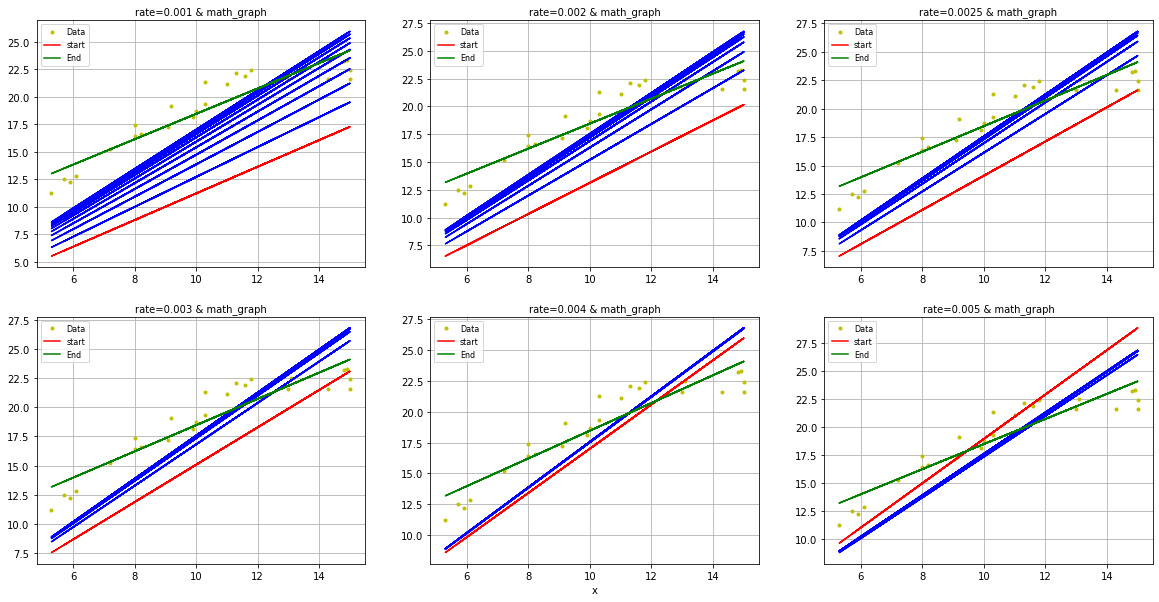

NORMAL:
[Learning rate] 0.01, [bias,기울기] : [nan nan], [MSE값] : nan


C:\Users\parks\AppData\Local\Temp/ipykernel_17272/3275634154.py:39: RuntimeWarning: invalid value encountered in subtract
  th = th - rate * gradient


[Learning rate] 0.005, [bias,기울기] : [7.22332688 1.12400319], [MSE값] : 1.863197
[Learning rate] 0.001, [bias,기울기] : [6.88283164 1.15426704], [MSE값] : 1.872450
[Learning rate] 0.0005, [bias,기울기] : [5.56382918 1.27150243], [MSE값] : 2.082987
[Learning rate] 0.0001, [bias,기울기] : [1.33178109 1.64765474], [MSE값] : 4.633410
[Learning rate] 5e-05, [bias,기울기] : [0.32079584 1.73751299], [MSE값] : 5.665715


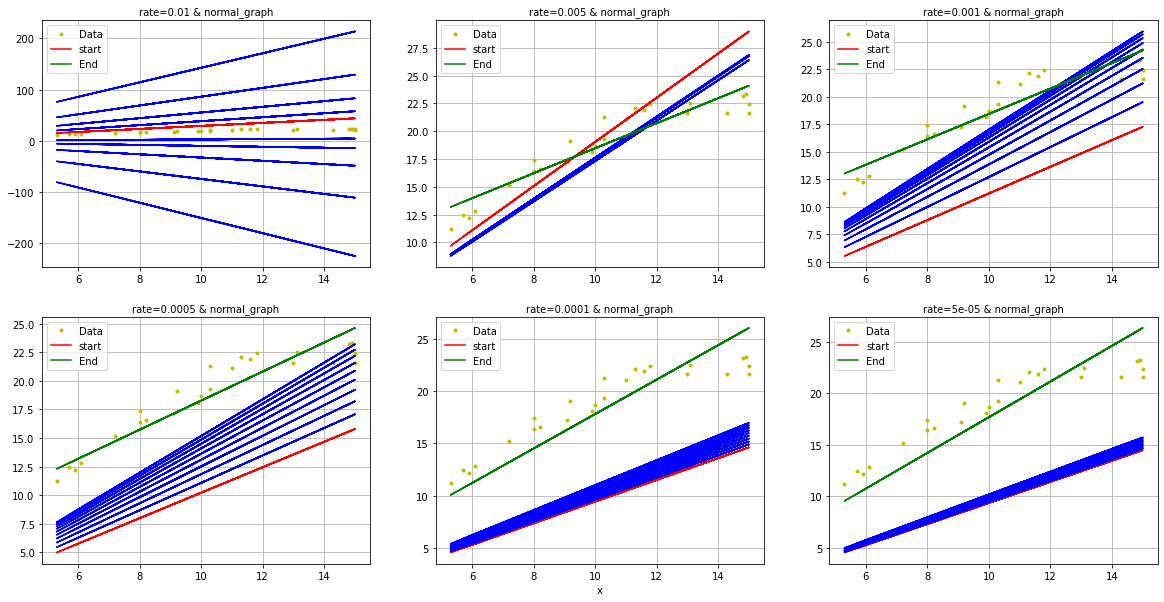

[Learning rate] 0.001, [bias,기울기] : [6.88283164 1.15426704], [MSE값] : 1.872450
[Learning rate] 0.002, [bias,기울기] : [7.20899881 1.12527669], [MSE값] : 1.863213
[Learning rate] 0.0025, [bias,기울기] : [7.220389   1.12426431], [MSE값] : 1.863197
[Learning rate] 0.003, [bias,기울기] : [7.22272524 1.12405666], [MSE값] : 1.863197
[Learning rate] 0.004, [bias,기울기] : [7.22330261 1.12400535], [MSE값] : 1.863197
[Learning rate] 0.005, [bias,기울기] : [7.22332688 1.12400319], [MSE값] : 1.863197


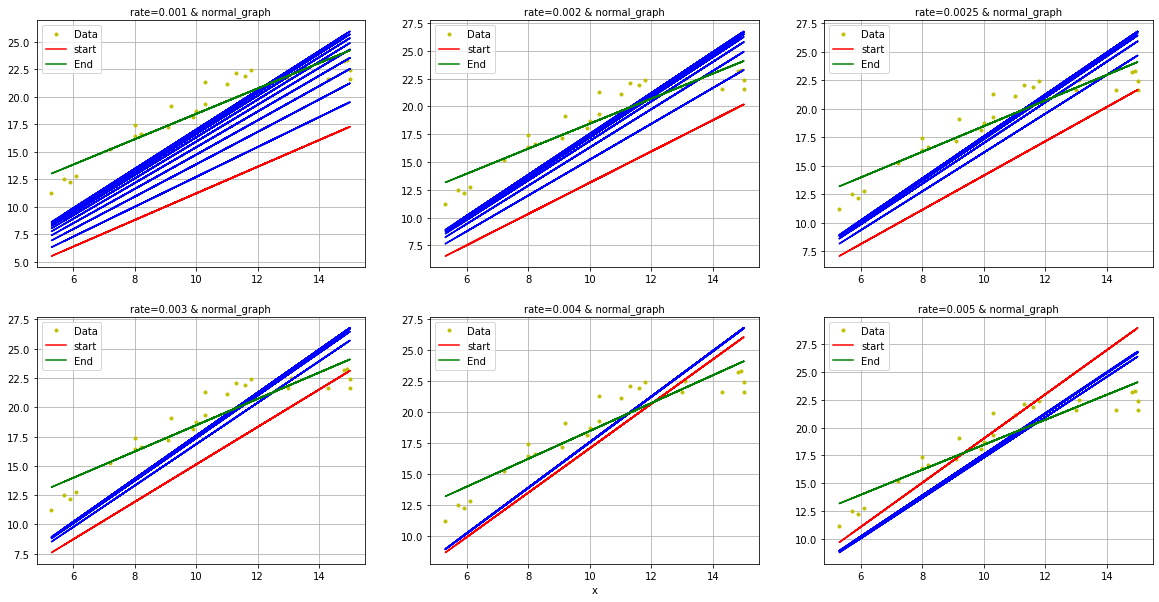

In [10]:
print("\n\n===========================================")
print("=               실습 #6                   =")
print("===========================================")

print("임의의 초기 theta값 : ", gd_theta)
print("초기 learning rate : ",learning_rate)
print("초기 반복 값 : ", n_iter)

# 경사하강법 STOP
# 오차 허용 변수
tolerance = 0.0001
# 오차 계산 함수
def isStop(now_th, before_th):
    # 현재 theta와 befoe theta값에 절대값 사용하여
    # 각각의 차이 중 큰 값이 오차 허용 값보다 작을 때 참을 반환
    th_abs = np.abs(now_th) 
    before_th_abs = np.abs(before_th)
    result = (abs(th_abs - before_th_abs).max() < tolerance)
    return result

##### 경사하강법 그래프
# theata의 매개변수 learning rate에 따른 값의 변화를 보기 위한 함수
# show : 해당 함수에서 그래프 출력까지 함께 할 것인지 설정하는 변수
def theta_normal_graph(rate=learning_rate, th=gd_theta, show=True):
    # 최종 theta(가중치)에 대한 오류율 확인을 위한 변수   
    mse = 0
    
    # 가장 먼저 기본 데이터를 출력
    if show:
        plt.plot(x,y,'y.', label="Data")
    
    # 반복 횟수를 고정한 채 진행
    for i in range(n_iter):
        # theta값의 변화량을 알기위해 이전 before th 값 저장
        before_th = th
        
        # 행렬을 통한 기울기 계산
        gradient = 2/N * x_bias.T.dot(x_bias.dot(th) - y)
        th = th - rate * gradient
        
        # 그래프를 출력하지 않을때 = 결과 값만 원할 때
        if not show: 
            # 멈추는 함수 작동
            if isStop(th, before_th):
                break
        
        # 초반 10번 마지막 1번에 대한 예측 모델 출력하기 위한 if문
        if i < 10 or i >n_iter - 2:
            
            # 예측 모델 생성
            y_pred = x_bias.dot(th)
            
            #기본 그래프 출력 스타일
            style = "b-"
            legend = None
            
            # 처음과 마지막은 다른 색으로 그래프 표시
            # 처음 = 빨간색,  중간 = 파란색,  마지막 = 초록색
            if i == 0:
                style = 'r-'
                legend = "start"
            elif i == n_iter - 1:
                style = 'g-' 
                legend = "End"
                
                # MSE 값 계산
                mse = ((y_pred-y)**2).mean()
            
            if show:
                plt.plot(x, y_pred, style, label=legend)
                plt.legend(loc="upper left", fontsize=10)
    if show:
        plt.title("rate={} & normal_graph".format(rate), fontsize=10)   
        plt.grid(True)
    print("[Learning rate] {}, [bias,기울기] : {}, [MSE값] : {:.6f}".format(rate, th, mse))
    return th

#위와 동일한 함수이며 계산 방법만 다름
# show : 해당 함수에서 그래프 출력까지 함께 할 것인지 설정하는 변수
def theta_math_graph(rate=learning_rate, th=gd_theta ,show=True):
    # 최종 theta(가중치)에 대한 오류율 확인을 위한 변수   
    mse = 0
    
    # 각 값 매칭
    W0 = th[1]; W1 = th[0]
    
    # 가장 먼저 기본 데이터를 출력
    if show:
        plt.plot(x,y,'y.', label="Data")
    
    # 반복 횟수를 고정한 채 진행
    for i in range(n_iter):  
        # 수식 통한 기울기 계산
        before_th = np.array([W0, W1])
        
        W0 = W0 - rate * gradient(0, W0, W1)
        W1 = W1 - rate * gradient(1, W0, W1)
        
        if not show: 
            # 멈추는 함수 작동
            if isStop(np.array([W0,W1]), before_th):
                break
        
        # 초반 10번 마지막 1번에 대한 예측 모델 출력하기 위한 if문
        if i < 10 or i >n_iter - 2:
            # 예측 모델 생성
            y_pred = W0 * x + W1
            
            #기본 그래프 출력 스타일
            style = "b-"
            legend = None
            
            # 처음과 마지막은 다른 색으로 그래프 표시
            # 처음 = 빨간색,  중간 = 파란색,  마지막 = 초록색
            if i == 0:
                style = 'r-'
                legend = "start"
            elif i == n_iter - 1:
                style = 'g-' 
                legend = "End"
                
                # 에러 값 계산
                mse = ((y_pred-y)**2).mean()
            if show:    
                plt.plot(x, y_pred, style, label=legend)
                plt.legend(loc="upper left", fontsize = 8)
    if show:
        plt.title("rate={} & math_graph".format(rate), fontsize = 10)   
        plt.grid(True)
    
    print("[Learning rate] {}, [bias,기울기] {}, [MSE값] : {:.6f}".format(rate,[W1,W0],mse))
    return [W0,W1]

def print_rate(func):    
    plt.figure(figsize=(20,10))
    plt.subplot(231); th = func(rate=0.01)
    plt.subplot(232); th = func(rate=0.005)
    plt.subplot(233); th = func(rate=0.001)
    plt.subplot(234); th = func(rate=0.0005)
    plt.subplot(235); th = func(rate=0.0001); plt.xlabel("x")
    plt.subplot(236); th = func(rate=0.00005)
    plt.show()
    plt.figure(figsize=(20,10))
    plt.subplot(231); th = func(rate=0.001)
    plt.subplot(232); th = func(rate=0.002)
    plt.subplot(233); th = func(rate=0.0025)
    plt.subplot(234); th = func(rate=0.003)
    plt.subplot(235); th = func(rate=0.004); plt.xlabel("x")
    plt.subplot(236); th = func(rate=0.005)
    plt.show()

# 함수로 출력 제어
print("MATH:")
print_rate(theta_math_graph)
print("NORMAL:")
print_rate(theta_normal_graph)



=               실습 #7                   =


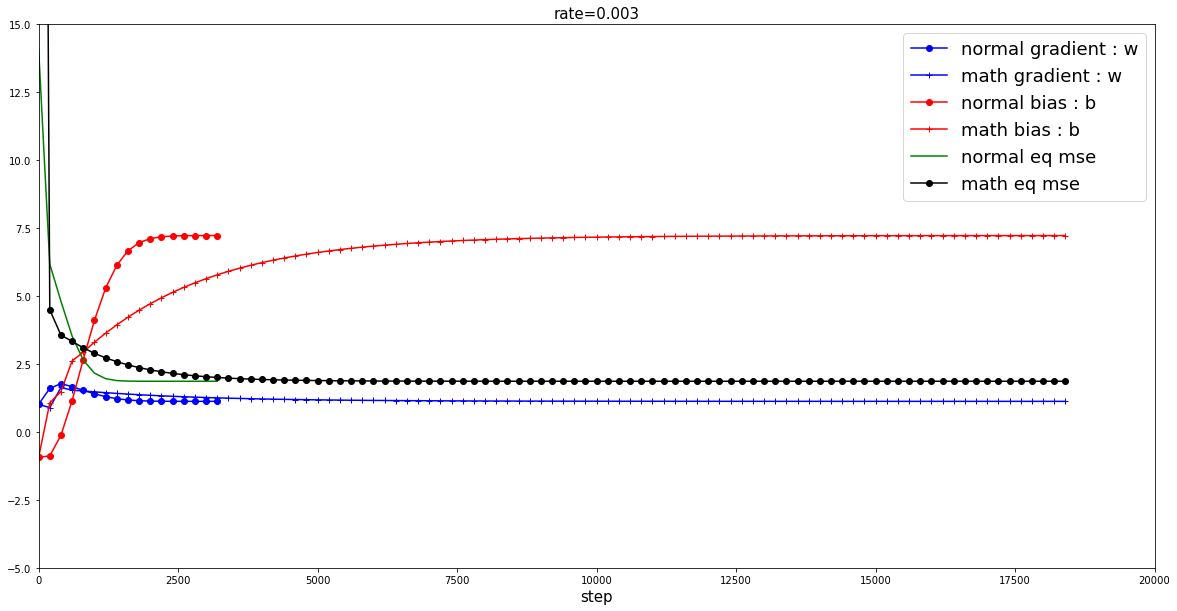

array([7.22330842, 1.12400483])

In [11]:
print("\n\n===========================================")
print("=               실습 #7                   =")
print("===========================================")

# 반복 횟수에 따른 결과 값
def theta_step_stop_graph(rate=learning_rate, th=gd_theta):
    # 그래프 출력을 위해 일정 구간마다 출력하기위해 선언
    step = 200
    
    # 그래프의 x축을 설정하기 위해 선언
    # 0번은 행렬 연산시 오차 허용 값보다 작아 멈출때까찌 추가
    # 1번은 수식 연산시 오차 허용 값보다 작아 멈출때까찌 추가
    x_step = [[],[]]
    
    # 멈추게 되면 그 이후는 그래프 출력하기 위한 배열 값에 추가하지 않는다.
    # 0번 = 행렬
    # 1번 = 수식
    stop = [False, False]
    
    # theata값과 W값 자체가 반대로 되어있다
    # theta[0]는 bias, theta[1]는 기울기 값, W0 = 기울기, W1 = bias
    th_math = th[::-1]
    
    # 각 그래프 출력을 위한 배열 
    th_normal_list = []
    th_math_list = []
    mse_normal_list = []
    mse_math_list = []
    
    for i in range(1,n_iter,step):
        before_th_normal = th
        before_th_math   = th_math
        
        # 허용 값 보다 클때 동작
        if not stop[0]:
            # theata값 추가 후 경사하강법 적용
            th_normal_list.append(th)
            th = normal_gd(i, th)
            # 해당하는 i좌표 값 추가
            x_step[0].append(i)
            
            # mse normal eq
            y_pred = x_bias.dot(th)
            mse = ((y_pred - y)**2).mean()
            mse_normal_list.append(mse)
        
        if not stop[1]:
            # theta값 추가 후 경사하강법 적용
            th_math_list.append(th_math)
            th_math = math_gd(i, th_math)
            # 해당하는 i좌표 값 추가
            x_step[1].append(i)
            
            # mse math 
            y_pred = th_math[0] * x + th_math[1]
            mse = ((y_pred - y)**2).mean()
            mse_math_list.append(mse)
        
        # 매 반복마다 해당 theta값과 이전 theta값의 변화율을 감지하여 결과 출력
        if isStop(th, before_th_normal):
            stop[0] = True
        
        if isStop(th_math,before_th_math):
            stop[1] = True
        
        # 모두 더 이상 변화가 없다면 끝낸다.
        if stop[0] and stop[1]:
            break
        
    # theata값을 가지는 리스트는 하나의 인덱스마다 [bias, 기울기]처럼 존재하기에
    # 리스트를 transpose하여 하나의 배열마다 각각의 값만 모으게 한다.
    th_normal_list = np.array(th_normal_list).T
    th_math_list = np.array(th_math_list).T
    plt.figure(figsize=(20,10))
    plt.plot(x_step[0], th_normal_list[1], 'b-o', label="normal gradient : w")
    plt.plot(x_step[1], th_math_list[0], 'b-+', label="math gradient : w")
    plt.plot(x_step[0], th_normal_list[0], 'r-o', label="normal bias : b")
    plt.plot(x_step[1], th_math_list[1], 'r-+', label="math bias : b")
    plt.plot(x_step[0], mse_normal_list, 'g-', label="normal eq mse")
    plt.plot(x_step[1], mse_math_list, '-o', color="#000000", label="math eq mse")
    plt.xlabel("step", fontsize = 15)
    plt.ylim(-5,15)
    plt.xlim(0,n_iter)
    plt.legend(loc="upper right", fontsize=18)
    plt.title("rate={}".format(rate), fontsize = 15)   
    plt.show()
    return th

theta_step_stop_graph()



=               실습 #8                   =
[Learning rate] 0.003, [bias,기울기] [7.014159502668704, 1.1425944440472986], [MSE값] : 0.000000
[Learning rate] 0.003, [bias,기울기] : [7.01296696 1.14270037], [MSE값] : 0.000000


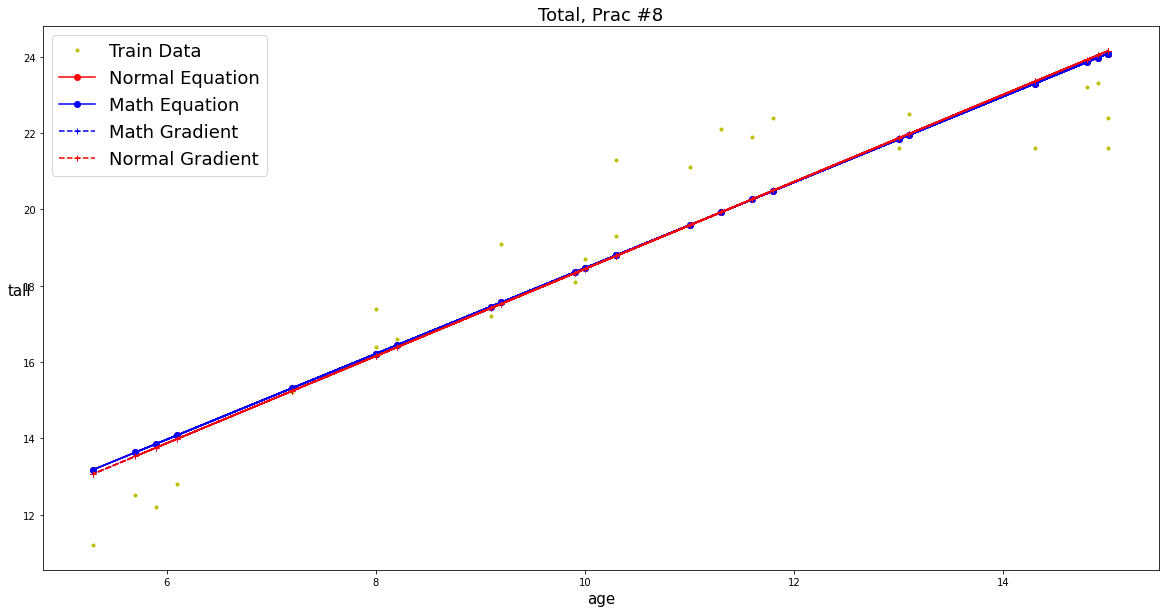

In [12]:
print("\n\n===========================================")
print("=               실습 #8                   =")
print("===========================================")

###### 실습 #8
# 훈련 데이터   x, y
# 해석해
math_model = y_math_pred
normal_model = y_normal_pred
# 경사하강법
best_math_th = theta_math_graph(show=False)
best_normal_th = theta_normal_graph(show=False)

math_gd_model = best_math_th[0] *x + best_math_th[1]
normal_gd_model = x_bias.dot(best_normal_th)

plt.figure(figsize=(20,10))
plt.plot(x, y, 'y.',label="Train Data")
plt.plot(x, normal_model, 'r-o',label="Normal Equation")
plt.plot(x, math_model, 'b-o',label="Math Equation")
plt.plot(x, math_gd_model, 'b--+',label="Math Gradient")
plt.plot(x, normal_gd_model, 'r--+',label="Normal Gradient")
plt.xlabel("age", fontsize=15)
plt.ylabel("tall", rotation=0, fontsize=15)
plt.legend(loc="upper left", fontsize=18)
plt.title("Total, Prac #8", fontsize=18)
plt.show()